# BELT Basic Example

In [1]:
from belt.run import BELT
import os


# Setup

Instantiate the object on a value init file. This will configure a working directory that stages all input and output files.

In [2]:
test = BELT(input = "example1/belt.in", workdir = os.environ.get('SCRATCH'),
            command = '/sdf/group/ad/sw/beta/bin/xbelt')

Here is what the parsed input looks like

In [3]:
test.input.parameters

Parameters(np=1024, nz=128, zmin=-0.002981592, zmax=0.002211398, flagfwd=1, flagdist=200, Iavg=0.13, Ek=92706472.0, mass=511005.0, charge=-1.0, freq=1300000000.0)

In [4]:
test.input.lattice_lines

[ChangeEnergy(energy_increment=5462800.0, name='aee_E'),
 ChangeEnergySpread(energy_spread_increment=7000.0, name='aee_eE'),
 DriftTube(length=74.9744159418, beam_radius=0.0003, name='D1'),
 Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=41.0, switch=1.0, name='Wake1'),
 RFCavity(length=16.603888, beam_radius=0.0003, gradient=10907447.83, frequency=1300000000.0, phase_deg=-17.43982832, name='L1'),
 Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=41.0, switch=-1.0, name='Wake2'),
 DriftTube(length=8.5305163742, beam_radius=0.0003, name='D2'),
 Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=42.0, switch=1.0, name='Wake3'),
 RFCavity(length=5.5346304, beam_radius=0.0003, gradient=9053035.459, frequency=3900000000.0, phase_deg=-148.9681881, name='Xbane'),
 Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=42.0, switch=-1.0, name='Wake4'),
 DriftTube(length=12.518616788, beam_radius=0.0003, name='D3'),
 DriftTube(length=7.256313209, beam_radiu

The input format that belt will see

In [5]:
test.write_input()
!cat {test.path}/belt.in

cat: /sdf/scratch/users/j/jytang/tmpig90i7i9/belt.in: No such file or directory


# Run

In [6]:
output = test.run()

In [7]:
test.output.run

RunInfo(error=False, error_reason='', run_script='/sdf/group/ad/sw/beta/bin/xbelt', run_time=0.35575613938272)

# Output

<!-- lume-genesis detected Jupyter and will use HTML for rendering. -->

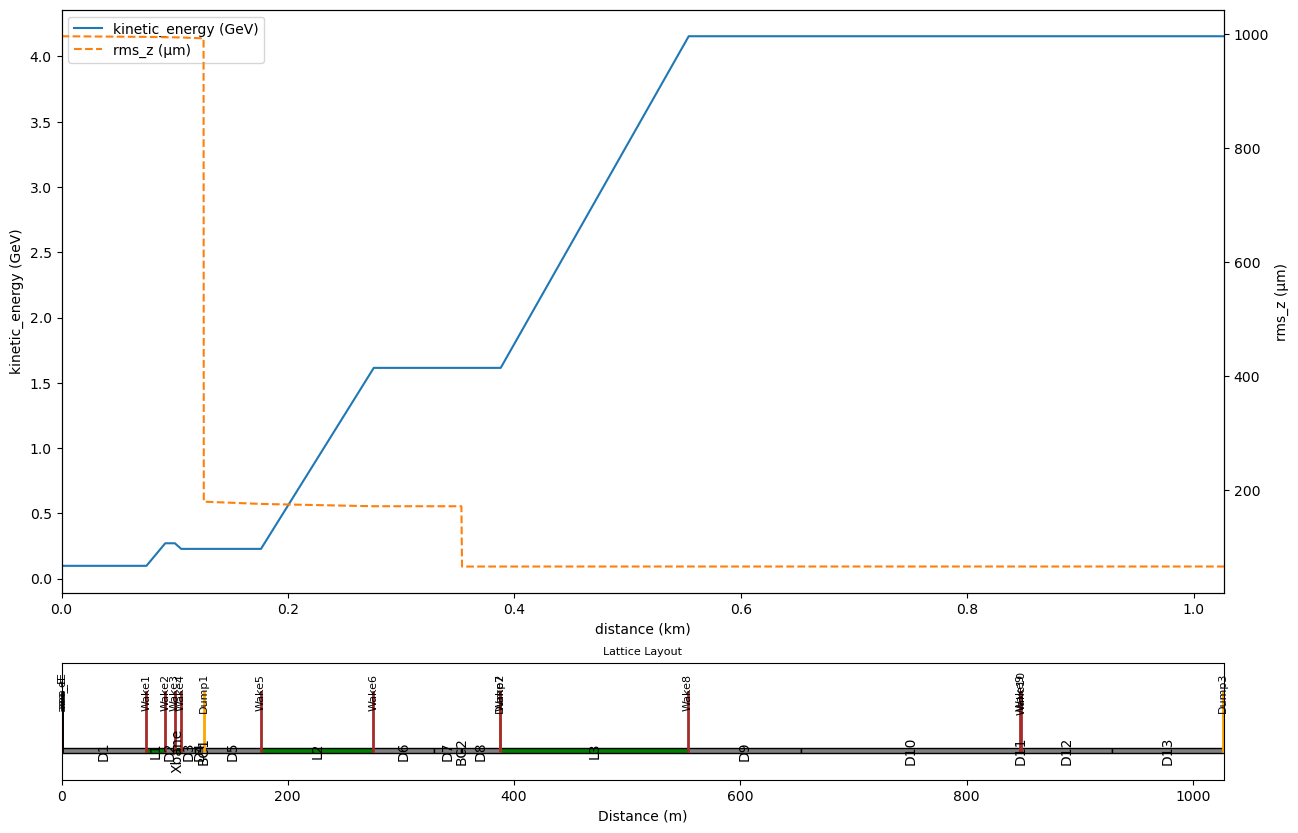

In [8]:
test.plot()

In [9]:
particles = test.output.particle_distributions
print(particles.keys())

dict_keys([101, 221, 211, 201, 213])


initial particle distribution

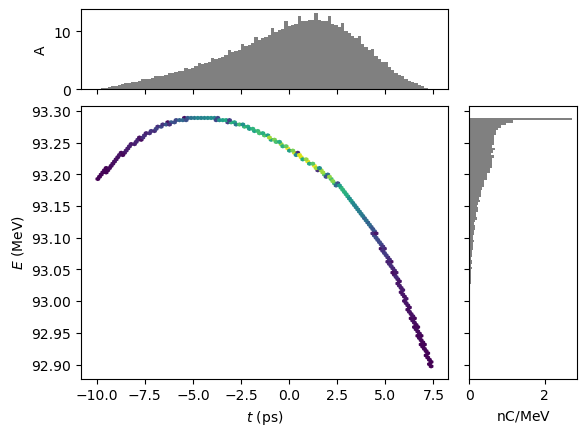

In [10]:
test.output.plot_distribution(file_id = 101, xkey = 't', ykey = 'energy', bins = 100)

LPS after BC1

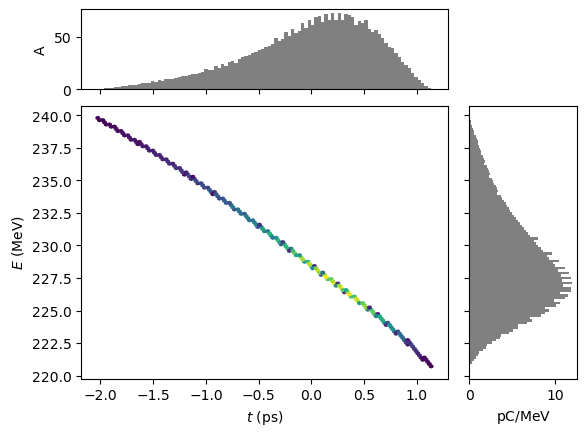

In [11]:
test.output.plot_distribution(file_id = 211, xkey = 't', ykey = 'energy', bins = 100)

Final LPS

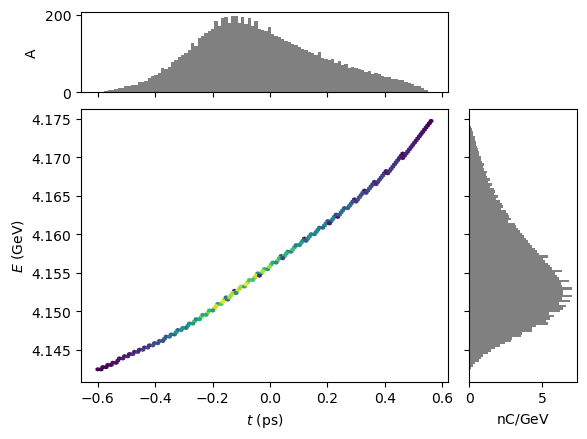

In [12]:
test.output.plot_distribution(file_id = 201, xkey = 't', ykey = 'energy', bins = 100)

# Archiving

In [14]:
test.archive('./archivefile.h5')

In [15]:
test.load_archive('./archivefile.h5')